In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


200.0


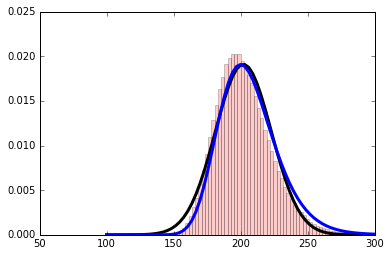

In [107]:

fm = 1.84 * 1e-2 # meters
ppitch = 3.45 * 1e-6 # meters
fpx = fm / ppitch
b = 0.75  # meters

def ftr(fc, baseline, disp): # get depth from disparity
    return fc*baseline/disp
def ftr_inv(fc, baseline, disp): # get inverse depth from disparity
    return 1/ftr(fc, baseline, disp)


disp = 20
dgt = ftr(fpx, b, disp)
print dgt


nosamp = 500000
sig = 2.0
dis_rnd = disp + np.random.normal(0.0, sig, nosamp)
d_rnd = ftr(fpx, b, dis_rnd)
dinv_rnd = ftr_inv(fpx, b, dis_rnd)


# Fit a normal distributions:
mu, std = norm.fit(d_rnd)
mu_inv, std_inv = norm.fit(dinv_rnd)


# Plot fit of normal distribution
plt.figure()
plt.hist(d_rnd, bins=100, color=np.array([1.0,0,0]), normed=True, alpha=0.2)
plt.hold('on')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pd = norm.pdf(x, mu, std)
#p /= np.sum(p)
plt.plot(x, pd, 'k', linewidth=3, label='depth_normal')

pdi = norm.pdf(1.0/x, mu_inv, std_inv)
pdi = pdi/np.max(pdi) * np.max(pd)
plt.plot(x, pdi, 'b', linewidth=3, label='depth_inv_normal')
plt.xlim([50, 300])
plt.show()


